# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [7]:
%matplotlib notebook

import logging
logging.basicConfig(level=logging.ERROR)


import calendar

from datetime import timedelta, datetime

from matplotlib import pyplot as plt
#plt.style.use('dark_background')
plt.style.use('seaborn')
from matplotlib import cm

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',None)

from helper import *
from austria import Austria
from ecdc import ECDC

today =f'{datetime.now().year}_{datetime.now().month:02d}_{datetime.now().day:02d}'
ecdc = ECDC()
AT = Austria()
# print("TODAY: ", datetime.now(), "\nLatest case date: ", AT.epicurve.time.max(),
#       "\nTimestamps: ", AT.epicurve.Timestamp.unique())


def predict_future(past_days, past_y, ndays=14, predict_days=30, degree_fit=2):
    '''
    @ndays: number of days to consider from the end for predicting future
    '''
    past_y = np.array(past_y)
    future = np.arange(0,ndays+predict_days)
    past_days = past_days.dt.to_pydatetime()
    future_days = pd.date_range(start =past_days[-ndays], 
                                end =past_days[-1]+ timedelta(days=predict_days)).to_list()

    x = np.arange(ndays)
    z = np.polyfit(x,past_y[-ndays:], degree_fit)    
    p = np.poly1d(z)    
    return future_days, p(future)


## R eff.

<IPython.core.display.Javascript object>


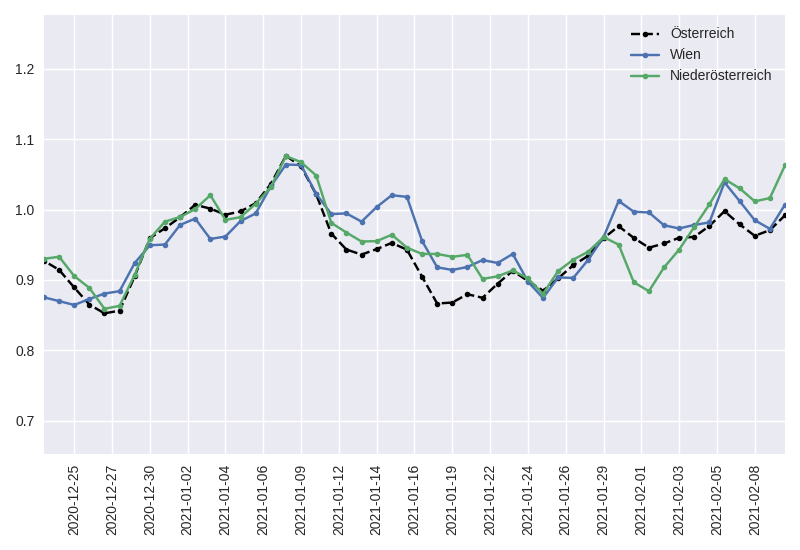

In [8]:
rdf_bundesland = pd.read_csv('https://www.ages.at/fileadmin/AGES2015/Wissen-Aktuell/COVID19/R_eff_bundesland.csv',  
            quotechar='"', delimiter=';',
           encoding='iso-8859-1')
rdf = pd.read_csv('https://www.ages.at/fileadmin/AGES2015/Wissen-Aktuell/COVID19/R_eff.csv',  
            quotechar='"', delimiter=';',
           encoding='iso-8859-1')
def str2float(x):
    return float(str(x).replace(',','.'))

rdf_bundesland['R_eff'] = rdf_bundesland.R_eff.apply(str2float)
rdf['R_eff'] = rdf.R_eff.apply(str2float)

f, ax = plt.subplots()
ax.plot(rdf.Datum, rdf.R_eff, label='Österreich', color='k', linestyle='--', marker='o', markersize=4)

# bundesland = rdf_bundesland.Bundesland.unique()
bundesland = ['Wien', 'Niederösterreich']
# viridis = cm.get_cmap('viridis', len(bundesland))
for i, bnd in enumerate(bundesland):
    df = rdf_bundesland[rdf_bundesland.Bundesland==bnd].sort_values(by='Datum')
    ax.plot(df.Datum, df.R_eff, label=bnd, 
#             color=viridis.colors[i], alpha=0.5,
            marker='o', markersize=4)
    
ndays = 50
plt.xlim((rdf.Datum.iloc[-ndays], rdf.Datum.iloc[-1]))
plt.ylim((min(rdf.R_eff.iloc[-ndays:])-0.2,max(rdf.R_eff.iloc[-ndays:])+0.2))
pretty_plot(ax)

## Cases


### Weekly

<IPython.core.display.Javascript object>


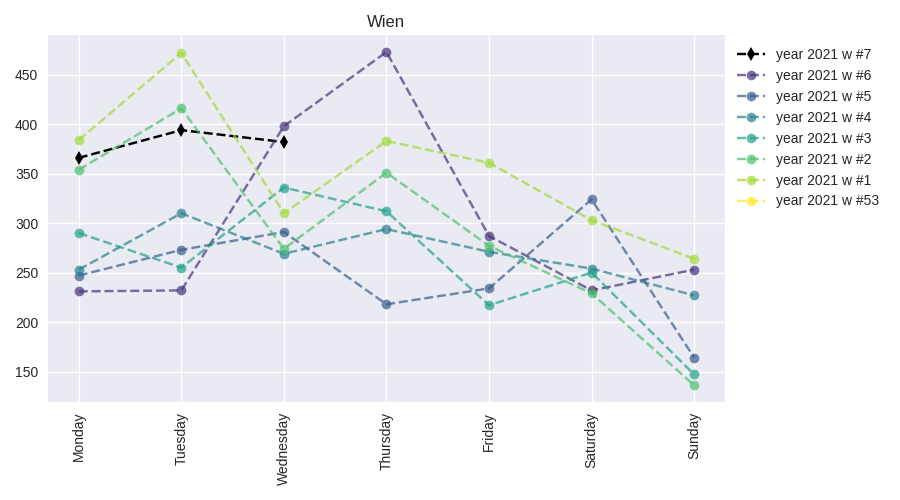

<IPython.core.display.Javascript object>


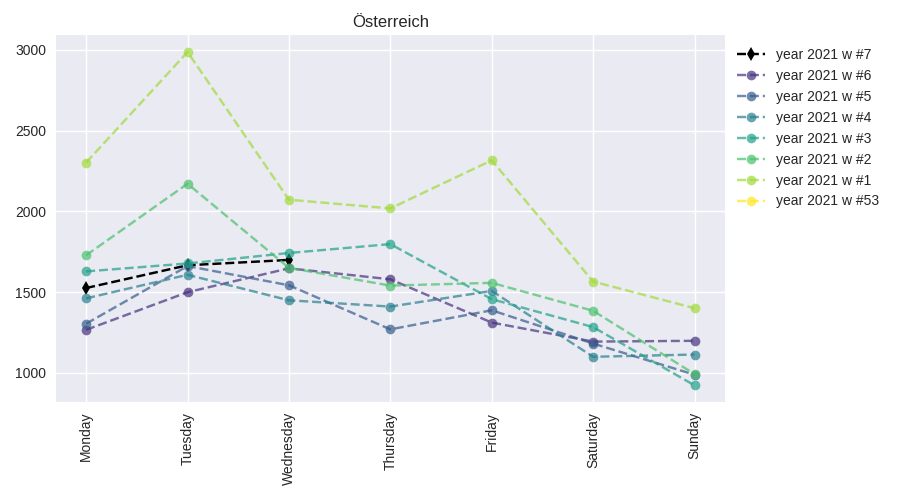

<AxesSubplot:title={'center':'Österreich'}>

In [24]:
HISTORY = 8
AT.plot_cases_by_day_of_the_week(num_weeks_history=HISTORY, bezirk='Wien')
AT.plot_cases_by_day_of_the_week(num_weeks_history=HISTORY, bezirk='')


### Time Series

<IPython.core.display.Javascript object>


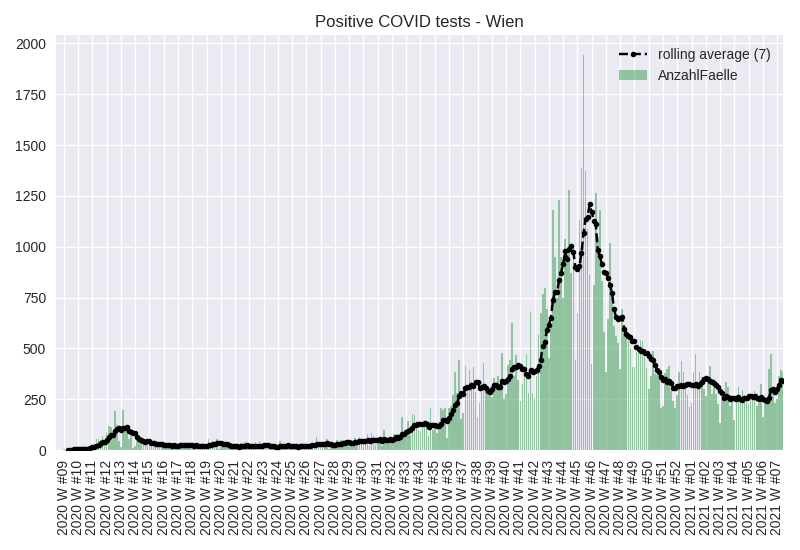

[Timestamp('2020-02-26 00:00:00'), Timestamp('2021-02-17 00:00:00')]


<IPython.core.display.Javascript object>


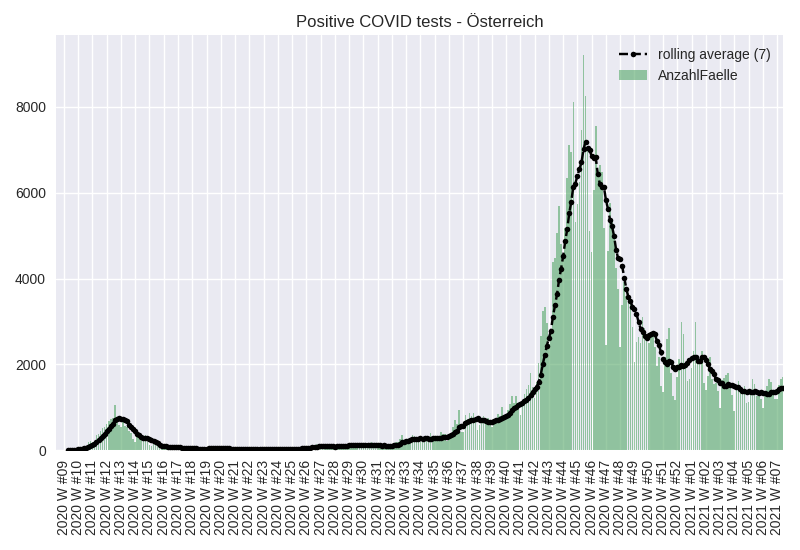

[Timestamp('2020-02-26 00:00:00'), Timestamp('2021-02-17 00:00:00')]


In [10]:

# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax = AT.plot_tägliche_erkrankungen(roll_days=7, ndays=0, bezirk='Wien')
ax = AT.plot_tägliche_erkrankungen(roll_days=7, ndays=0, bezirk=None)

# selection =  ecdc.select_country('AT',   ndays=1000,).sort_values(by=['dateRep'], ascending=True,)
# # ax.plot(,.rolling(14).mean(), marker='o', markersize=4, linestyle='--')
# ax = plot_rolling_avg(ax,selection.dateRep, y= selection['cases_weekly'], roll_days=14, label='ECDC', color='C0')

# plt.yscale('log')



# AT.epicurve['tägliche Erkrankungen'], ecdc.select_country('AT').cases_weekly.sum()



### Weekly Totals

In [13]:
# f, ax = plt.subplots()
# new_year = AT.epicurve.groupby( by=AT.epicurve.time.dt.isocalendar().week]).agg({'tägliche Erkrankungen':'sum'})
# new_year.head()
# ax.plot( AT.epicurve['time'], AT.epicurve['tägliche Erkrankungen'].rolling(14).sum())
# pretty_plot(ax)
# # new_year.head()
# # new_year.plot(ax=ax,
# #        marker='o')
df = AT.fälle_timeline_gkz[AT.fälle_timeline_gkz.Bezirk == 'Wien']
df.head()

df.groupby(by=df.Time.dt.isocalendar().week).agg({'AnzahlFaelle':['sum','mean'],
                                                  'AnzahlFaelleSum':['mean']}).tail(5)

AnzahlFaelle             AnzahlFaelleSum
              sum        mean            mean
week                                         
49           3772  538.857143    61581.857143
50           3245  463.571429    64984.000000
51           2422  346.000000    67778.000000
52           2207  315.285714    70060.142857
53           2248  321.142857    72310.714286

In [14]:
# AT.fälle_timeline_gkz.Bezirk.unique()

In [15]:
wien_cases = AT.fälle_timeline_gkz[AT.fälle_timeline_gkz.Bezirk=='Wien']
wien_cases.tail()

,Time,Bezirk,GKZ,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
33275,2021-02-13,Wien,900,1911191,232,84932,2017,"105,5363",7,1618,238,76908
33369,2021-02-14,Wien,900,1911191,253,85185,2106,"110,1931",3,1621,137,77045
33463,2021-02-15,Wien,900,1911191,366,85551,2241,"117,2567",5,1626,232,77277
33557,2021-02-16,Wien,900,1911191,394,85945,2403,"125,7331",4,1630,291,77568
33651,2021-02-17,Wien,900,1911191,382,86327,2387,"124,8959",10,1640,256,77824


### Cases prediction

<IPython.core.display.Javascript object>


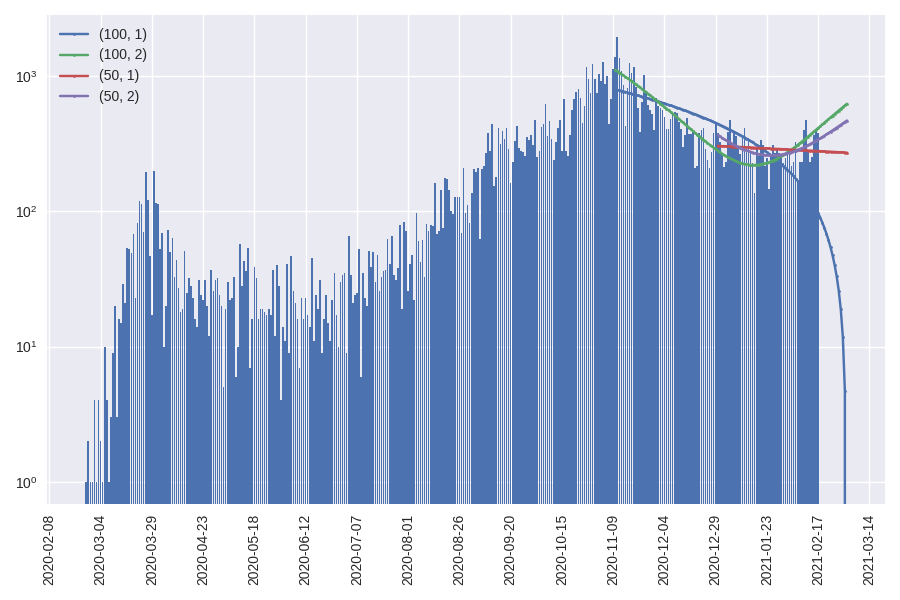

In [16]:

f, ax = plt.subplots(figsize=(9,6))
# ax.bar(AT.epicurve.time, AT.epicurve['tägliche Erkrankungen'])
ax.bar(wien_cases.Time, wien_cases.AnzahlFaelle)
for hist in [100,50]:
    for df in [1, 2]:
        x, y = predict_future(wien_cases.Time, wien_cases.AnzahlFaelle, ndays=hist, predict_days=14, degree_fit=df)        
        ax.plot(x, y, label=f'({hist}, {df})', linestyle='-', marker='o', markersize=2)
        
# plt.legend(loc='best')
pretty_plot(ax, log=True)

## Number of Cases

### Vienna

In [17]:
AT.fall_zählen.Bundesland.unique()

array(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
       'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien', 'Alle'],
      dtype=object)

2021-02-17 00:00:00


<IPython.core.display.Javascript object>


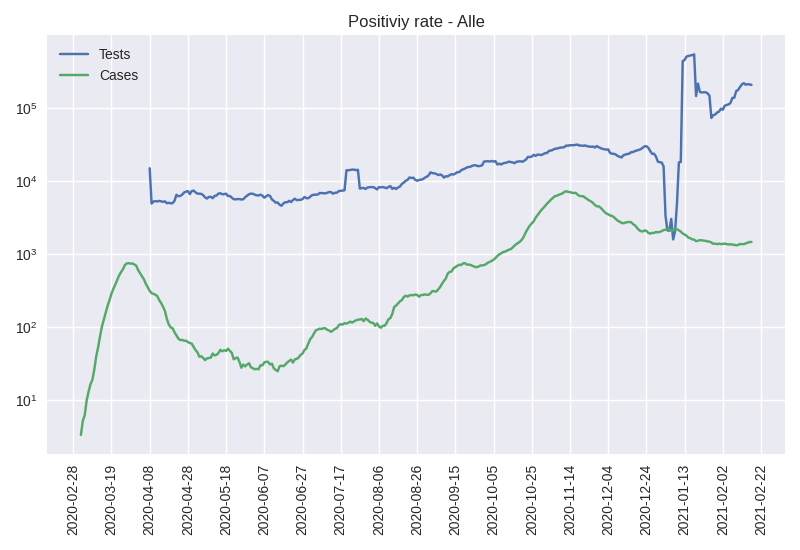

<AxesSubplot:title={'center':'Positiviy rate - Alle'}>

In [21]:
AT.plot_positivity_rate(bundesland='Alle')
# AT.plot_positivity_rate(bundesland='Wien')

## Corona Ampel

In [19]:
ampel = AT.ampel_aktuell

# ampel.sort_values('Warnstufe', ascending=False).head(10)
ampel.groupby('Warnstufe').agg({'Name':concat, 'Region': 'count'})

,Name,Region
Warnstufe,,
3,"Linz(Stadt), Steyr(Stadt), Wels(Stadt), Braunau am Inn, Eferding, Freistadt, Gmunden, Grieskirchen, Kirchdorf an der Krems, Linz-Land, Perg, Ried im Innkreis, Rohrbach, Schärding, Steyr-Land, Urfahr-Umgebung, Vöcklabruck, Wels-Land, Oberösterreich",19
4,"Eisenstadt(Stadt), Rust(Stadt), Eisenstadt-Umgebung, Güssing, Jennersdorf, Mattersburg, Neusiedl am See, Oberpullendorf, Oberwart, Klagenfurt Stadt, Villach Stadt, Hermagor, Klagenfurt Land, Sankt Veit an der Glan, Spittal an der Drau, Villach Land, Völkermarkt, Wolfsberg, Feldkirchen, Krems an der Donau(Stadt), Sankt Pölten(Stadt), Waidhofen an der Ybbs(Stadt), Wiener Neustadt(Stadt), Amstetten, Baden, Bruck an der Leitha, Gänserndorf, Gmünd, Hollabrunn, Horn, Korneuburg, Krems(Land), Lilienfeld, Melk, Mistelbach, Mödling, Neunkirchen, Sankt Pölten(Land), Scheibbs, Tulln, Waidhofen an der Thaya, Wiener Neustadt(Land), Zwettl, Salzburg(Stadt), Hallein, Salzburg-Umgebung, Sankt Johann im Pongau, Tamsweg, Zell am See, Graz(Stadt), Deutschlandsberg, Graz-Umgebung, Leibnitz, Leoben, Liezen, Murau, Voitsberg, Weiz, Murtal, Bruck-Mürzzuschlag, Hartberg-Fürstenfeld, Südoststeiermark, Innsbruck-Stadt, Imst, Innsbruck-Land, Kitzbühel, Kufstein, Landeck, Lienz, Reutte, Schwaz, Bludenz, Bregenz, Dornbirn, Feldkirch, Burgenland, Kärnten, Niederösterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien, Bartholomäberg, Blons, Bludenz, Bludesch, Brand, Bürs, Bürserberg, Dalaas, Fontanella, Gaschurn, Innerbraz, Klösterle, Lech, Lorüns, Ludesch, Nenzing, Nüziders, Raggal, St. Anton im Montafon, St. Gallenkirch, St. Gerold, Schruns, Silbertal, Sonntag, Stallehr, Thüringen, Thüringerberg, Tschagguns, Vandans, Alberschwende, Andelsbuch, Au, Bezau, Bildstein, Bizau, Bregenz, Buch, Damüls, Doren, Egg, Eichenberg, Fußach, Gaißau, Hard, Hittisau, Höchst, Hörbranz, Hohenweiler, Kennelbach, Krumbach, Langen bei Bregenz, Langenegg, Lauterach, Lingenau, Lochau, Mellau, Mittelberg, Möggers, Reuthe, Riefensberg, Schnepfau, Schoppernau, Schröcken, Schwarzach, Schwarzenberg, Sibratsgfäll, Sulzberg, Warth, Wolfurt, Dornbirn, Hohenems, Lustenau, Altach, Düns, Dünserberg, Feldkirch, Frastanz, Fraxern, Göfis, Götzis, Klaus, Koblach, Laterns, Mäder, Meiningen, Rankweil, Röns, Röthis, Satteins, Schlins, Schnifis, Sulz, Übersaxen, Viktorsberg, Weiler, Zwischenwasser, nan",180


## Future Occupancy

In [31]:
NDAYS=30
latest_df = AT.fall_zählen[AT.fall_zählen.MeldeDatum==AT.fall_zählen.MeldeDatum.max()].sort_values('FZHospFree')
print(f'As of {AT.fall_zählen.MeldeDatum.max()}')
data = []
for bundesland in AT.fall_zählen.Bundesland.unique():
    bundesland_data = {'bundesland': bundesland}
    df = AT.fall_zählen[AT.fall_zählen.Bundesland==bundesland]
    limit_ICU = latest_df[latest_df.Bundesland==bundesland].FZICUFree.iloc[0]  + latest_df[latest_df.Bundesland==bundesland].FZICU.iloc[0]
    limit_Hosp = latest_df[latest_df.Bundesland==bundesland].FZHospFree.iloc[0]  + latest_df[latest_df.Bundesland==bundesland].FZHosp.iloc[0]
    bundesland_data['ICUFree'] = latest_df[latest_df.Bundesland==bundesland].FZICUFree.iloc[0]
    bundesland_data['HospFree'] = latest_df[latest_df.Bundesland==bundesland].FZHospFree.iloc[0]
    predict_days =  300
    days_left_icu = []
    days_left_hosp = []
    for degree_fit in (1,2,3):
        
        x,y = predict_future(df.MeldeDatum, df.FZICU, ndays=NDAYS, predict_days=predict_days, degree_fit=degree_fit)
        if y[np.argmax(y>=limit_ICU)] >= limit_ICU:
            days_left_icu.append( np.argmax(y>=limit_ICU)-NDAYS)
        else:
            days_left_icu.append(1000)

        x,y = predict_future(df.MeldeDatum, df.FZHosp, ndays=NDAYS, predict_days=predict_days, degree_fit=degree_fit)
        if y[np.argmax(y>=limit_Hosp)] >= limit_Hosp:
            days_left_hosp.append( np.argmax(y>=limit_Hosp)-NDAYS)
        else:
            days_left_hosp.append( 1000)


        
    bundesland_data['daysLeftICU'] = days_left_icu    
    bundesland_data['ICUMax_worst'] = AT.fall_zählen.MeldeDatum.max() + timedelta(days=int(min(days_left_icu)))
    bundesland_data['ICUMax_best'] = AT.fall_zählen.MeldeDatum.max() + timedelta(days=int(max(days_left_icu)))
    bundesland_data['daysLeftHosp'] = days_left_hosp
    
    bundesland_data['HospMax_worst'] = AT.fall_zählen.MeldeDatum.max() + timedelta(days=int(min(days_left_hosp)))
    bundesland_data['HospMax_best'] = AT.fall_zählen.MeldeDatum.max() + timedelta(days=int(max(days_left_hosp)))

    data.append(bundesland_data)
    
df_future = pd.DataFrame(data)
df_future.sort_values(by='ICUFree')

As of 2021-02-16 00:00:00


,bundesland,ICUFree,HospFree,daysLeftICU,ICUMax_worst,ICUMax_best,daysLeftHosp,HospMax_worst,HospMax_best
0,Burgenland,9,94,"[1000, 45, 7]",2021-02-23,2023-11-13,"[1000, 37, 49]",2021-03-25,2023-11-13
1,Kärnten,34,235,"[1000, 1000, 39]",2021-03-27,2023-11-13,"[1000, 53, 1000]",2021-04-10,2023-11-13
4,Salzburg,36,146,"[1000, 1000, 22]",2021-03-10,2023-11-13,"[1000, 1000, 1000]",2023-11-13,2023-11-13
6,Tirol,46,222,"[1000, 1000, 46]",2021-04-03,2023-11-13,"[1000, 1000, 1000]",2023-11-13,2023-11-13
7,Vorarlberg,63,121,"[1000, 1000, 14]",2021-03-02,2023-11-13,"[1000, 1000, 47]",2021-04-04,2023-11-13
5,Steiermark,65,375,"[1000, 35, 1000]",2021-03-23,2023-11-13,"[1000, 1000, 1000]",2023-11-13,2023-11-13
3,Oberösterreich,82,574,"[1000, 240, 1000]",2021-10-14,2023-11-13,"[1000, 53, 32]",2021-03-20,2023-11-13
2,Niederösterreich,98,747,"[1000, 56, 1000]",2021-04-13,2023-11-13,"[1000, 1000, 50]",2021-04-07,2023-11-13
8,Wien,185,1896,"[1000, 1000, 1000]",2023-11-13,2023-11-13,"[1000, 1000, 85]",2021-05-12,2023-11-13
9,Alle,618,4410,"[1000, 1000, 1000]",2023-11-13,2023-11-13,"[1000, 1000, 1000]",2023-11-13,2023-11-13


### Plots

<IPython.core.display.Javascript object>


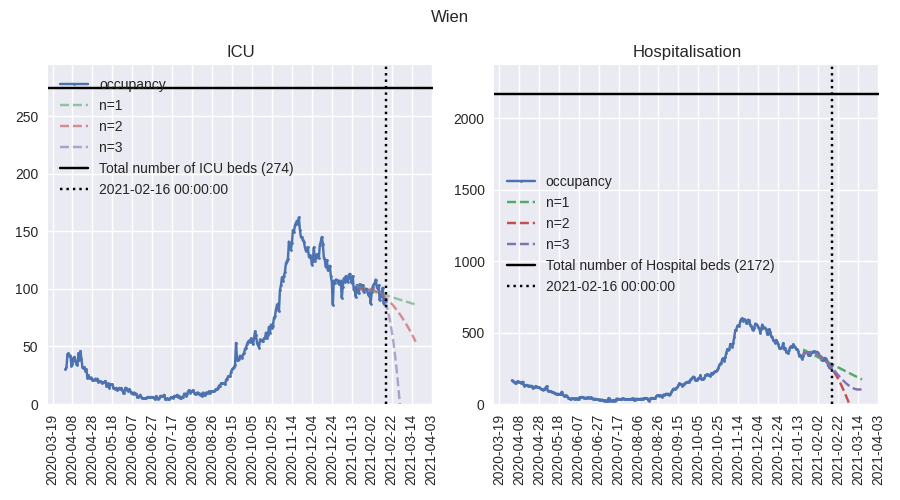

<IPython.core.display.Javascript object>


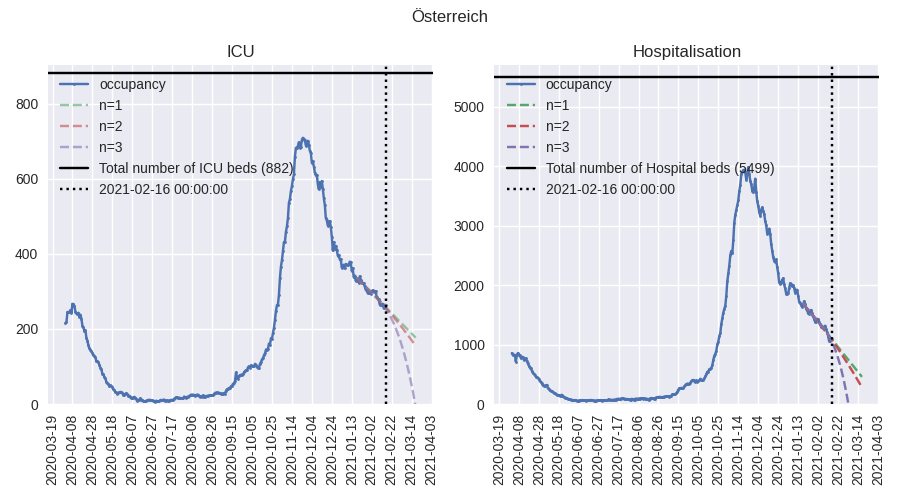

In [32]:


latest_df = AT.fall_zählen[AT.fall_zählen.MeldeDatum==AT.fall_zählen.MeldeDatum.max()].sort_values('FZHospFree')
for bundesland in [ 'Wien', 'Alle']:
    f, ax = plt.subplots(ncols=2,sharex=True, figsize=(9,5))
    df = AT.fall_zählen[AT.fall_zählen.Bundesland==bundesland]
    limit_ICU = latest_df[latest_df.Bundesland==bundesland].FZICUFree.iloc[0]  + \
                latest_df[latest_df.Bundesland==bundesland].FZICU.iloc[0]
    limit_Hosp = latest_df[latest_df.Bundesland==bundesland].FZHospFree.iloc[0]  + \
                 latest_df[latest_df.Bundesland==bundesland].FZHosp.iloc[0]

    predict_days =  max(int(latest_df.FZICUFree.iloc[0]),30)

    ax[0].plot(df.MeldeDatum, df.FZICU, label='occupancy', marker='o',markersize=2)
    ax[1].plot(df.MeldeDatum, df.FZHosp, label='occupancy', marker='o',markersize=2)

#     print(latest_df[latest_df.Bundesland==bundesland].MeldeDatum.iloc[0])
    days_left_ICU = []
    days_left_Hosp = []
    for degree_fit in (1,2,3):
        
        x,y = predict_future(df.MeldeDatum, df.FZICU, ndays=NDAYS, predict_days=predict_days, degree_fit=degree_fit)
        
        ax[0].plot(x, y, linestyle='--', label=f'n={degree_fit}', alpha=0.6)
        if y[np.argmax(y>=limit_ICU)] >= limit_ICU:
            days_left_ICU.append(np.argmax(y>=limit_ICU)-NDAYS)
       
        x,y = predict_future(df.MeldeDatum, df.FZHosp, ndays=NDAYS, predict_days=predict_days, degree_fit=degree_fit)
        ax[1].plot(x, y, linestyle='--', label=f'n={degree_fit}')
        if y[np.argmax(y>=limit_Hosp)] >= limit_Hosp:
            days_left_Hosp.append(np.argmax(y>=limit_Hosp)-NDAYS)
        
    ax[0].axhline(y=limit_ICU,color='k', label=f'Total number of ICU beds ({limit_ICU})')
    ax[1].axhline(y=limit_Hosp,color='k', label=f'Total number of Hospital beds ({limit_Hosp})')
    ax[0].set_ylim(0,limit_ICU+20)
    ax[1].set_ylim(0,limit_Hosp+200)
    ax[0].axvline(x=latest_df[latest_df.Bundesland==bundesland].MeldeDatum.iloc[0],
           color='k', linestyle='dotted',
           label=latest_df[latest_df.Bundesland==bundesland].MeldeDatum.iloc[0])
    ax[1].axvline(x=latest_df[latest_df.Bundesland==bundesland].MeldeDatum.iloc[0],
           color='k', linestyle='dotted',
           label=latest_df[latest_df.Bundesland==bundesland].MeldeDatum.iloc[0])

    title = bundesland if bundesland != 'Alle' else 'Österreich'
    if days_left_ICU:
        title = f'{title} - {min(days_left_ICU)} days'
    
    f.suptitle(title)
    ax[0].set_ylim(0,)
    pretty_plot(ax[0], title='ICU')
    pretty_plot(ax[1],title='Hospitalisation')
        
#     plt.savefig(f'ICU_{today}_{bundesland}.png')



## Bed capacity

<IPython.core.display.Javascript object>


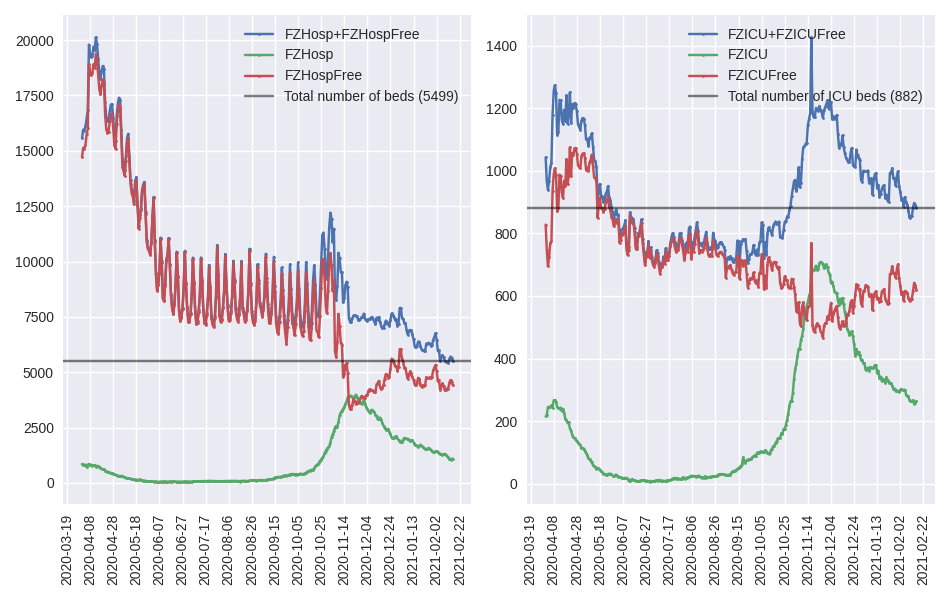

In [33]:
df = AT.fall_zählen[AT.fall_zählen.Bundesland=='Alle']

f,ax = plt.subplots(ncols=2, figsize=(9.5,6))
ax[0].plot(df.MeldeDatum, df.FZHosp+df.FZHospFree, label='FZHosp+FZHospFree',markersize=2, marker='o')    
ax[0].plot(df.MeldeDatum, df.FZHosp, label='FZHosp',markersize=2, marker='o')    
ax[0].plot(df.MeldeDatum, df.FZHospFree, label='FZHospFree',markersize=2, marker='o') 
ax[1].plot(df.MeldeDatum, df.FZICU+df.FZICUFree, label='FZICU+FZICUFree',markersize=2, marker='o')    
ax[1].plot(df.MeldeDatum, df.FZICU, label='FZICU',markersize=2, marker='o')    
ax[1].plot(df.MeldeDatum, df.FZICUFree, label='FZICUFree',markersize=2, marker='o')    
ax[0].axhline(y=df.FZHospFree.iloc[-1]+df.FZHosp.iloc[-1],color='k', label=f'Total number of beds ({limit_Hosp})',alpha=0.5)
ax[1].axhline(y=df.FZICUFree.iloc[-1]+df.FZICU.iloc[-1],color='k', label=f'Total number of ICU beds ({limit_ICU})',alpha=0.5)
# ax[0].set_ylabel('Number of Hospital Beds')
# ax[1].set_ylabel('Number of ICU Beds')
pretty_plot(ax[0])
pretty_plot(ax[1])

## Deaths

In [34]:
from gestorbene import Gestorbene
G = Gestorbene()
max(G.under_65.week_end)

Timestamp('2021-02-07 00:00:00')

### Overall Deaths

<IPython.core.display.Javascript object>


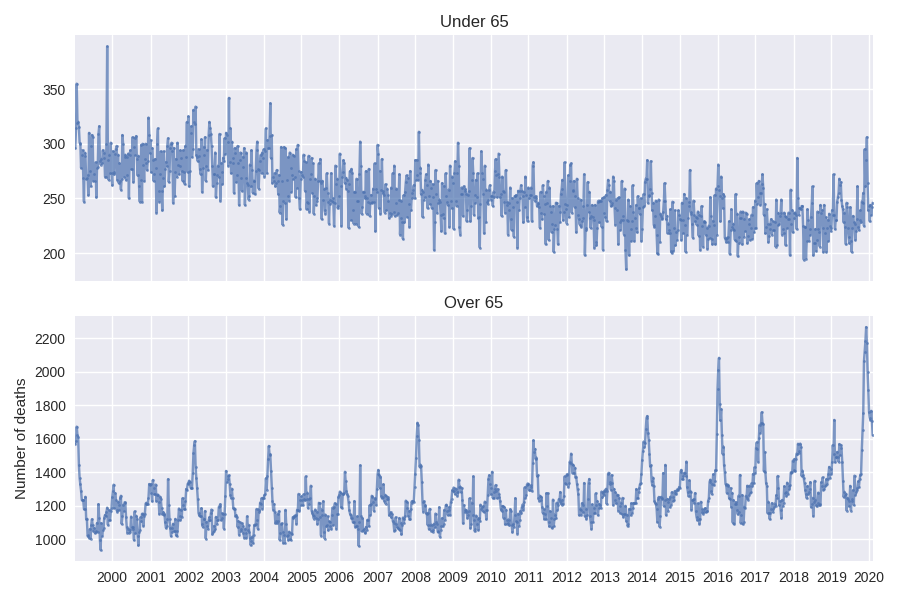

In [35]:
dates = pd.date_range(start=min(G.under_65.week_end), end = max(G.under_65.week_end),freq='Y',closed='left')
f, ax = plt.subplots(figsize=(9,6), sharex=True, nrows=2)
G.under_65.groupby(['week_end']).sum()['F-ANZ-1'].plot(ax=ax[0], alpha=0.7, marker='o', markersize=2, title='Under 65')
G.over_65.groupby(['week_end']).sum()['F-ANZ-1'].plot(ax=ax[1], alpha=0.7, marker='o', markersize=2, title='Over 65')
plt.xlabel('')
plt.ylabel('Number of deaths')
plt.xticks(dates, dates.strftime('%Y'))
plt.tight_layout()

### Group by month and year

<IPython.core.display.Javascript object>


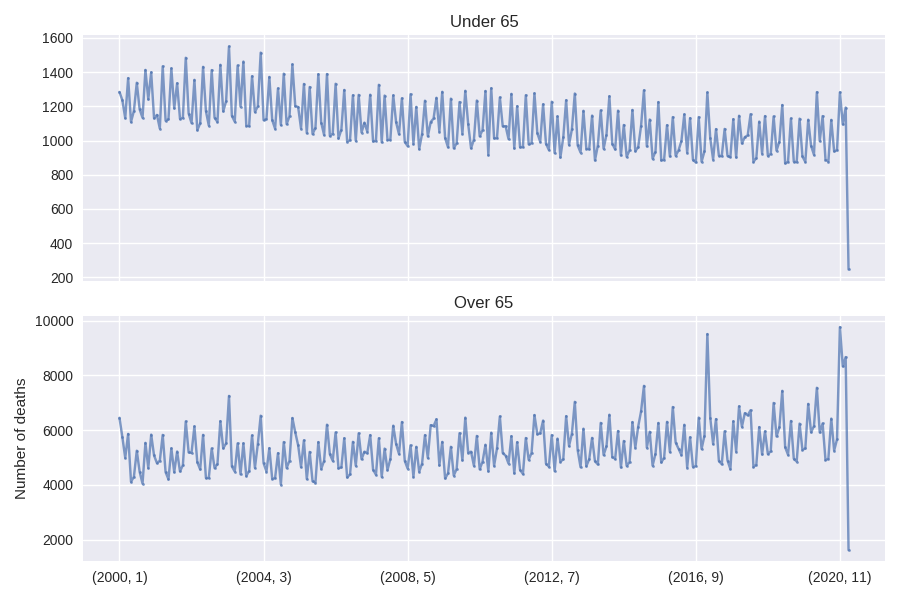

In [36]:
from matplotlib.ticker import FormatStrFormatter
dates = pd.date_range(start=min(G.under_65.week_end), end = max(G.under_65.week_end),freq='M')

f, ax = plt.subplots(figsize=(9,6), sharex=True,nrows=2)
G.under_65.groupby(by=[G.under_65.week_end.dt.year, G.under_65.week_end.dt.month]).sum()['F-ANZ-1'].plot(ax=ax[0], alpha=0.7, marker='o', markersize=2, title='Under 65')
G.over_65.groupby(by=[G.over_65.week_end.dt.year, G.over_65.week_end.dt.month]).sum()['F-ANZ-1'].plot(ax=ax[1], alpha=0.7, marker='o', markersize=2, title='Over 65')
plt.xlabel('')
plt.ylabel('Number of deaths')
# ax[1].xaxis.set_major_locator(plt.MaxNLocator(50));

# plt.xticks(dates,zip( dates.strftime('%Y'),dates.strftime('%M')));
# ax[1].xaxis.set_major_formatter(FormatStrFormatter('%Y'));

plt.tight_layout()

### By Sex

<IPython.core.display.Javascript object>


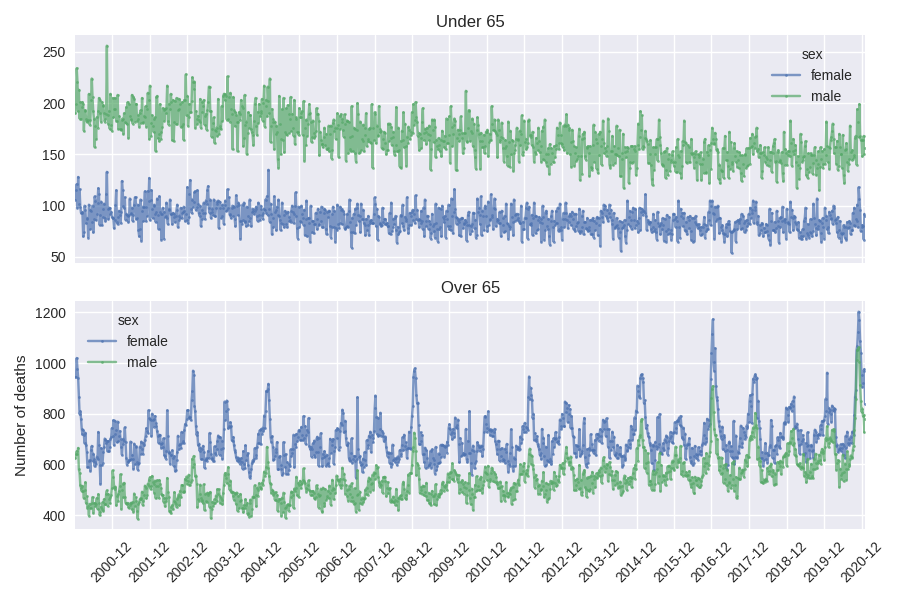

In [37]:
dates = pd.date_range(start=min(G.under_65.week_end), end = max(G.under_65.week_end),freq='Y',closed='left')
f, ax = plt.subplots(figsize=(9,6), sharex=True, nrows=2)
G.under_65.groupby(['week_end','sex']).sum()['F-ANZ-1'].unstack().plot(ax=ax[0], alpha=0.7, marker='o', markersize=2, title='Under 65')
G.over_65.groupby(['week_end','sex']).sum()['F-ANZ-1'].unstack().plot(ax=ax[1], alpha=0.7, marker='o', markersize=2, title='Over 65')
plt.xlabel('')
plt.xticks(rotation=45)

plt.ylabel('Number of deaths')
plt.xticks(dates, dates.strftime('%Y-%m'));
plt.tight_layout()

### Yearly

<IPython.core.display.Javascript object>


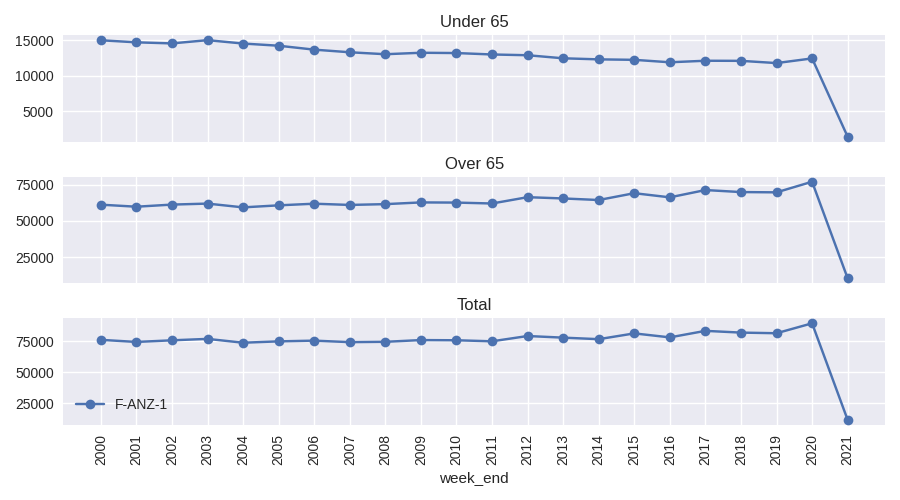

In [38]:
current_year = datetime.now().year
dfs = {'Under 65': G.under_65,
      'Over 65':  G.over_65,
      'Total': pd.concat([G.under_65, G.over_65])}

f, ax = plt.subplots(figsize=(9,5),nrows=len(dfs), sharex=True, sharey=False)
i = 0
for title, df in dfs.items():
    grouped = df.groupby(by=[df.week_end.dt.year]).agg('sum')
    grouped.head()
    grouped['F-ANZ-1'].plot(ax=ax[i], marker='o', title=title)
    i += 1
# 
pretty_plot(ax[-1],xticks=[df.week_end.dt.year.unique(),])


## Total number of deaths in Austria in 2020

### COVID

### All deaths

In [39]:
all_deaths = pd.concat([G.under_65, G.over_65])
all_deaths[all_deaths.week_end.dt.year == 2020]['F-ANZ-1'].sum()

89549

In [40]:
from matplotlib import cm


## Cumulative deaths in a year

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


<IPython.core.display.Javascript object>


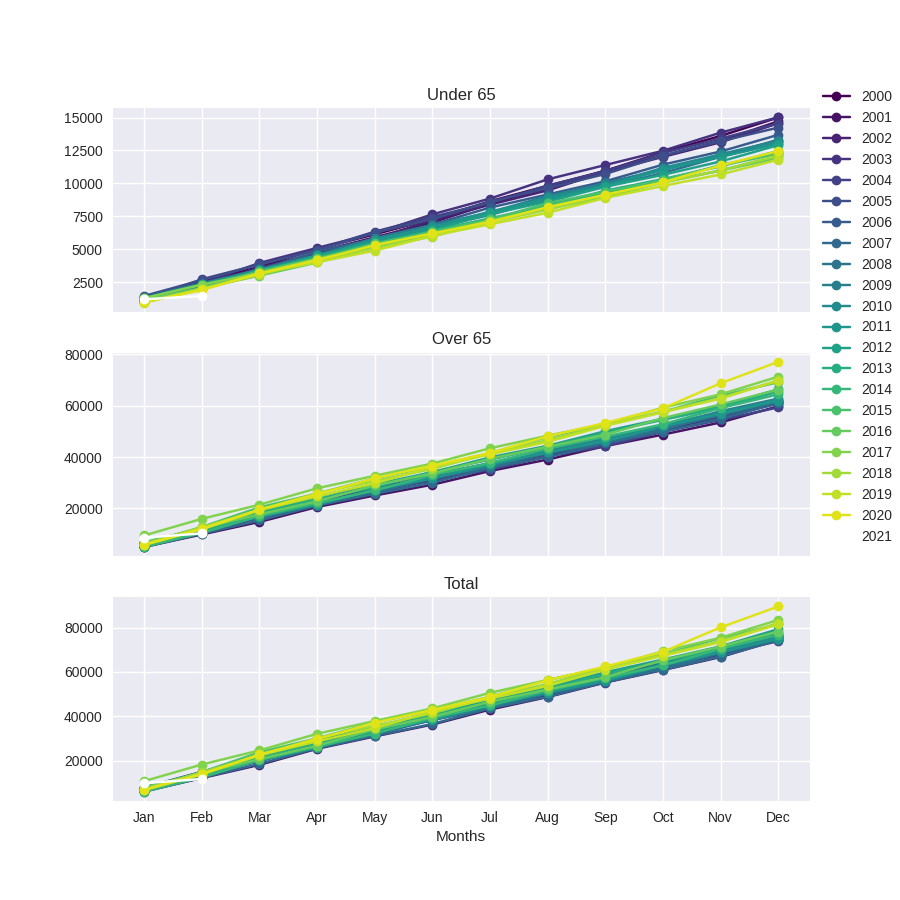

<ipython-input-41-4dc9717dfcd9>:31: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


In [41]:
current_year = datetime.now().year
NUM_YEARS = 10
YEARS = sorted(list(all_deaths.week_end.dt.year.unique()))
print(YEARS)
viridis = cm.get_cmap('viridis', len(YEARS))

# df.head()
dfs = {'Under 65': G.under_65,
      'Over 65':  G.over_65,
      'Total': pd.concat([G.under_65, G.over_65])}

f, ax = plt.subplots(figsize=(9,9),nrows=len(dfs), sharex=True, sharey=False)
j = -1
for title, all_deaths in dfs.items():
    j += 1
    for i, y in enumerate(YEARS):    
        if y == current_year:
            color='w'
        else:
            color=viridis.colors[i]
            
        df_year = all_deaths[all_deaths.week_end.dt.year == y]
        grouped = df_year.groupby(by=[all_deaths.week_end.dt.month]).agg('sum')        
        grouped['F-ANZ-1'].cumsum().plot(ax=ax[j], marker='o',label=y, title=title,c=color)
    

plt.xlabel('Months')    
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(bbox_to_anchor=(1, 1.2), loc='lower left')    

plt.tight_layout()
    


## Vaccines

In [42]:
vaccines = pd.read_csv('https://info.gesundheitsministerium.gv.at/data/laender.csv', delimiter=';')

In [43]:
vaccines.head(100)

,Name,Auslieferungen,AuslieferungenPro100,Bestellungen,BestellungenPro100,Bevölkerung,BundeslandID
0,Burgenland,12404,4.21,15014,5.10,294436,1.0
1,Kärnten,31397,5.59,40913,7.29,561293,2.0
2,Niederösterreich,79292,4.71,87188,5.18,1684287,3.0
3,Oberösterreich,84386,5.66,107430,7.21,1490279,4.0
4,Salzburg,27549,4.93,29779,5.33,558410,5.0
5,Steiermark,69451,5.57,79651,6.39,1246395,6.0
6,Tirol,38638,5.10,45414,5.99,757634,7.0
7,Vorarlberg,22445,5.65,27703,6.98,397139,8.0
8,Wien,101189,5.29,114645,6.00,1911191,9.0
9,Österreich,466751,5.24,547737,6.15,8901064,10.0


## Columns in the DFs

In [44]:
print(AT.fall_zählen.columns)
AT.fall_zählen[AT.fall_zählen.Bundesland=='Wien'].head()

Index(['Meldedat', 'TestGesamt', 'MeldeDatum', 'FZHosp', 'FZICU', 'FZHospFree',
       'FZICUFree', 'BundeslandID', 'Bundesland'],
      dtype='object')


,Meldedat,TestGesamt,MeldeDatum,FZHosp,FZICU,FZHospFree,FZICUFree,BundeslandID,Bundesland
8,01.04.2020,0,2020-04-01,165,30,0,0,9,Wien
18,02.04.2020,18880,2020-04-02,158,32,0,0,9,Wien
28,03.04.2020,19618,2020-04-03,156,43,0,0,9,Wien
38,04.04.2020,20740,2020-04-04,148,44,0,0,9,Wien
48,05.04.2020,22144,2020-04-05,150,42,0,0,9,Wien


In [45]:
print(AT.fälle_timeline_gkz.columns)
AT.fälle_timeline_gkz.Bezirk.unique()
AT.fälle_timeline_gkz[AT.fälle_timeline_gkz.Bezirk=='Wien'].head()

Index(['Time', 'Bezirk', 'GKZ', 'AnzEinwohner', 'AnzahlFaelle',
       'AnzahlFaelleSum', 'AnzahlFaelle7Tage', 'SiebenTageInzidenzFaelle',
       'AnzahlTotTaeglich', 'AnzahlTotSum', 'AnzahlGeheiltTaeglich',
       'AnzahlGeheiltSum'],
      dtype='object')


,Time,Bezirk,GKZ,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
93,2020-02-26,Wien,900,1911191,1,1,1,"0,05232339",0,0,0,0
187,2020-02-27,Wien,900,1911191,2,3,3,"0,1569702",0,0,0,0
281,2020-02-28,Wien,900,1911191,1,4,4,"0,2092936",0,0,0,0
375,2020-02-29,Wien,900,1911191,1,5,5,"0,261617",0,0,0,0
469,2020-03-01,Wien,900,1911191,4,9,9,"0,4709105",0,0,0,0
